In [3]:
# Solving Classification problems using Logistic Regression

# getting the Titanic dataset
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing

# read the data
df = pd.read_csv(r'C:\Users\maria\Downloads\Project Data\titanic\train.csv') 
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# drop the columns that are not useful to us
df = df.drop('PassengerId', axis=1) 
# axis=1 means column
df = df.drop('Name',        axis=1)
df = df.drop('Ticket',      axis=1)
df = df.drop('Cabin',       axis=1)

In [5]:
# drop rows with missing values
df = df.dropna()               # drop all rows 
                               # with NaN
df = df.reset_index(drop=True) # re-index the 
                               # dataframe
print(df.head(10))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
5         0       1    male  54.0      0      0  51.8625        S
6         0       3    male   2.0      3      1  21.0750        S
7         1       3  female  27.0      0      2  11.1333        S
8         1       2  female  14.0      1      0  30.0708        C
9         1       3  female   4.0      1      1  16.7000        S


In [6]:
# Encoding the Non-Numeric Fields

# initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# convert Sex and Embarked features to numeric
sex_encoded = label_encoder.fit_transform(df["Sex"])
print(sex_encoded)
# 0 = female
# 1 = male
df['Sex'] = sex_encoded
embarked_encoded = label_encoder.fit_transform(df["Embarked"])
print(embarked_encoded)
# 0 = C
# 1 = Q
# 2 = S
df['Embarked'] = embarked_encoded

print(df.head())

[1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 1 1 1 1 1 

In [7]:
# Making Fields Categorical
df["Pclass"]   = pd.Categorical(df["Pclass"])
df["Sex"]      = pd.Categorical(df["Sex"])
df["Embarked"] = pd.Categorical(df["Embarked"])
df["Survived"] = pd.Categorical(df["Survived"])
print(df.dtypes)    # examine the datatypes for each feature

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


In [13]:
# Splitting the Dataset into Train and Test Sets

# use all columns except Survived as features for training
features = df.drop('Survived', axis=1)

# the label is Survived
label = df['Survived']

from sklearn.model_selection import train_test_split

# split the dataset into train and test sets
train_features,test_features, train_label,test_label = train_test_split(
        features,
        label,
        test_size = 0.25, # split ratio
        random_state = 1, # Set random seed 
        stratify = df["Survived"])

# training set
print(train_features.head())
print(train_label)

    Pclass Sex   Age  SibSp  Parch     Fare Embarked
514      3   1  21.0      0      0   8.4333        2
382      3   1   9.0      5      2  46.9000        2
285      1   0  22.0      0      1  55.0000        2
142      2   1  30.0      0      0  13.0000        2
671      3   1  34.5      0      0   6.4375        0
514    0
382    0
285    1
142    0
671    0
      ..
525    0
331    1
682    1
212    0
691    0
Name: Survived, Length: 534, dtype: category
Categories (2, int64): [0, 1]


In [15]:
# Test set for validation
print(test_features.head())
print(test_label)

    Pclass Sex   Age  SibSp  Parch     Fare Embarked
227      3   1  19.0      0      0   8.0500        2
318      2   1  46.0      0      0  26.0000        2
538      3   1  20.0      0      0   9.2250        2
199      1   1  37.0      1      1  52.5542        2
235      2   1  36.0      0      0  12.8750        0
227    1
318    0
538    0
199    1
235    0
      ..
631    0
237    0
436    1
639    1
35     0
Name: Survived, Length: 178, dtype: category
Categories (2, int64): [0, 1]


In [17]:
# Training the Model

# initialize logistic regression model
log_regress = linear_model.LogisticRegression()

# Train the model
log_regress.fit(X = train_features,
                y = train_label)

# check trained model intercept
print(log_regress.intercept_)

# check trained model coefficients
print(log_regress.coef_)

[5.71750707]
[[-1.24711598e+00 -2.50448553e+00 -5.02882727e-02 -3.46402752e-01
  -8.59985780e-03  8.96418413e-04 -1.42872719e-01]]


In [19]:
# Making predictions
preds = log_regress.predict(X=test_features)
print(preds)

# Predict the probablities
pred_probs = log_regress.predict_proba(X=test_features) 
print(pred_probs)

[0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1]
[[0.85350159 0.14649841]
 [0.86493632 0.13506368]
 [0.85955125 0.14044875]
 [0.61972897 0.38027103]
 [0.74650285 0.25349715]
 [0.02070782 0.97929218]
 [0.02630937 0.97369063]
 [0.65298712 0.34701288]
 [0.89697811 0.10302189]
 [0.86479417 0.13520583]
 [0.94917696 0.05082304]
 [0.85969953 0.14030047]
 [0.61758467 0.38241533]
 [0.03257093 0.96742907]
 [0.79173197 0.20826803]
 [0.91616299 0.08383701]
 [0.96644503 0.03355497]
 [0.28174994 0.71825006]
 [0.67518618 0.32481382]
 [0.39511058 0.60488942]
 [0.88396216 0.11603784]
 [0.85978646 0.14021354]
 [0.35292898 0.64707102]
 [0.7530131  0.2469869 ]
 [0.92171118 0.07828882]
 [0.90731962 

In [21]:
# Displaying the Metrics

# Generate table of predictions vs actual
print(pd.crosstab(preds, test_label))

# get the accuracy of the prediction
log_regress.score(X = test_features , y = test_label)

Survived   0   1
row_0           
0         90  20
1         16  52


0.797752808988764

In [23]:
from sklearn import metrics
# view the confusion matrix
metrics.confusion_matrix(
    y_true = test_label,    # True labels
    y_pred = preds)         # Predicted labels

# view summary of common classification metrics
print(metrics.classification_report(
      y_true = test_label,
      y_pred = preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       106
           1       0.76      0.72      0.74        72

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



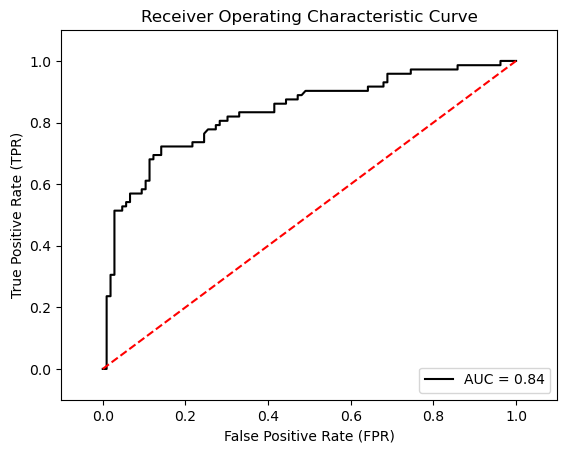

[0.         0.00943396 0.00943396 0.01886792 0.01886792 0.02830189
 0.02830189 0.04716981 0.04716981 0.05660377 0.05660377 0.06603774
 0.06603774 0.09433962 0.09433962 0.10377358 0.10377358 0.11320755
 0.11320755 0.12264151 0.12264151 0.14150943 0.14150943 0.21698113
 0.21698113 0.24528302 0.24528302 0.25471698 0.27358491 0.27358491
 0.28301887 0.28301887 0.30188679 0.30188679 0.33018868 0.33018868
 0.41509434 0.41509434 0.4245283  0.44339623 0.44339623 0.47169811
 0.47169811 0.48113208 0.49056604 0.64150943 0.64150943 0.67924528
 0.67924528 0.68867925 0.68867925 0.74528302 0.74528302 0.80188679
 0.82075472 0.85849057 0.85849057 0.96226415 0.96226415 1.        ]
[0.         0.         0.23611111 0.23611111 0.30555556 0.30555556
 0.51388889 0.51388889 0.52777778 0.52777778 0.54166667 0.54166667
 0.56944444 0.56944444 0.58333333 0.58333333 0.61111111 0.61111111
 0.68055556 0.68055556 0.69444444 0.69444444 0.72222222 0.72222222
 0.73611111 0.73611111 0.76388889 0.77777778 0.77777778 0.791

In [27]:
# Displaying the Receiver Operating Characteristic (ROC) Curve

from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

# convert the probabilities from ndarray to dataframe
df_prob = pd.DataFrame(
    pred_probs, 
    columns=['Death', 'Survived'])
fpr, tpr, thresholds = roc_curve(
    test_label, df_prob['Survived'])

# find the area under the curve (auc) for the ROC
roc_auc = auc(fpr, tpr)
plt.title(
    'Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'black',
         label='AUC = %0.2f'% roc_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

plt.ylabel('True Positive Rate (TPR)')    
plt.xlabel('False Positive Rate (FPR)')   
plt.show()

print(fpr) 
# Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

print(tpr) 
# Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

print(thresholds)